In [ ]:
# pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


import torch
import torch.nn as nn

import matplotlib.pyplot as plt  # or
import plotly.express as px

2025-06-24 17:34:42.168251: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 17:34:42.186935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750768482.209293   15813 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750768482.215656   15813 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750768482.232902   15813 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
 # Read dataset
import pandas as pd
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
# print(df.head())
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In pandas, when using df.drop(), the axis parameter specifies whether you intend to drop rows or columns.
axis=0 or axis='index':
This indicates that the operation should be performed along the rows, meaning you are dropping rows. This is the default behavior if axis is not explicitly specified.
axis=1 or axis='columns':
This indicates that the operation should be performed along the columns, meaning you are dropping columns.

In pandas, setting inplace=True within a method means that the operation will modify the DataFrame or Series object directly, without creating a new object and returning it.

In [4]:
drop_columns = ['ID']
df.drop(columns=drop_columns, axis=0, inplace=True)
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
#Check if data is null anywhere in table

null_counts = df.isnull().sum()
print(null_counts)

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
features_X = df.drop(columns=['Personal Loan'])
# features_X.describe()
target_Y = df['Personal Loan']
# target_Y.describe()

features_matrix = features_X.to_numpy()
print(features_matrix)

print(features_matrix.shape)

target_vector = target_Y.to_numpy()

print(target_vector.shape)

[[25.  1. 49. ...  0.  0.  0.]
 [45. 19. 34. ...  0.  0.  0.]
 [39. 15. 11. ...  0.  0.  0.]
 ...
 [63. 39. 24. ...  0.  0.  0.]
 [65. 40. 49. ...  0.  1.  0.]
 [28.  4. 83. ...  0.  1.  1.]]
(5000, 12)
(5000,)


In [7]:
# Initialize StandardScaler
scaler = StandardScaler() # Fit scaler to features matrix

#scaled features_matrix = scaler.fit_transform(features_matrix)
scaled_features_matrix = scaler.fit_transform(features_matrix)
print(scaled_features_matrix.shape)



(5000, 12)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_matrix, target_vector, test_size=0.2, random_state=42)
X_train.shape
# X_test
# y_train
# y_test

(4000, 12)

In [9]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input + hidden layer
    Dense(8, activation='relu'),                                     # Another hidden layer
    Dense(1, activation='sigmoid')                                   # Output layer (binary classification)
])

/home/samiahmad/Documents/Data_Scientist/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-24 17:34:48.878063: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=50,
    callbacks=[early_stop]
)
# history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.3859 - val_accuracy: 0.9038 - val_loss: 0.2983
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: 0.2814 - val_accuracy: 0.9087 - val_loss: 0.2373
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9231 - loss: 0.2193 - val_accuracy: 0.9187 - val_loss: 0.2041
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.1971 - val_accuracy: 0.9262 - val_loss: 0.1791
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.1878 - val_accuracy: 0.9312 - val_loss: 0.1601
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9416 - loss: 0.1515 - val_accuracy: 0.9450 - val_loss: 0.1451
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.1555 - val_accuracy: 0.9488 - val_loss: 0.1338
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9491 - loss: 0.1328 - val_accuracy: 0.9550 - val_loss:

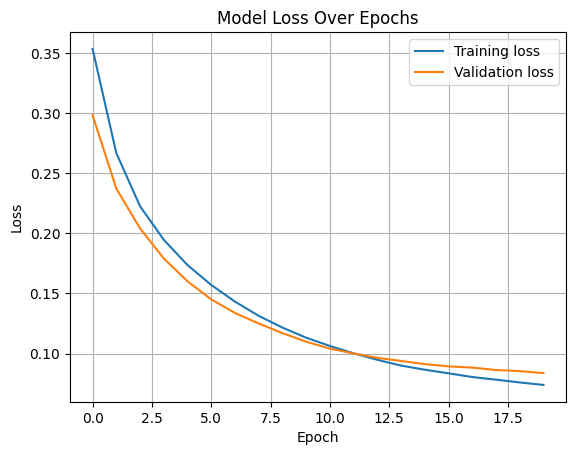

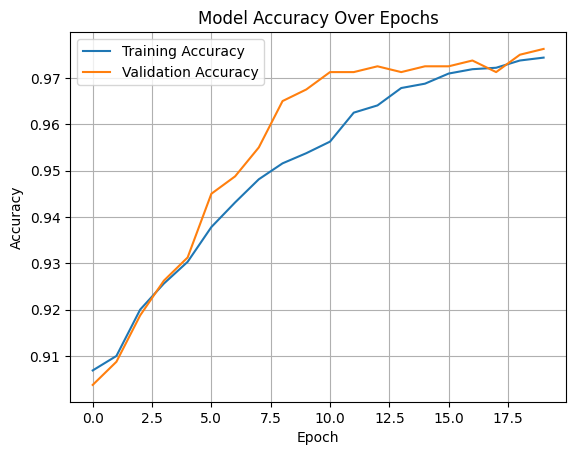

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Also for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# use pandas to create graphs! df.plot and on backend use matplotlib


In [15]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.0584  


[0.06901346147060394, 0.9779999852180481]